# CO2 with Non-EEG features

In [1]:
import pandas as pd

In [2]:
## Lets load the data

full_df = pd.read_pickle("full_df_2021_CO2.pkl")
pd.set_option('display.max_columns', None)

## This the data cleaning. Keeping only the relevant features and removing the less than equal to zero target values

df1= full_df.drop(full_df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,23]], axis=1)

j=[]
for i in range(4,72):
    j.append(i)
df2 = df1.drop(df1.columns[j], axis=1)
df3 = df2.drop(df2.columns[[11,12,13,14,15,16,17,18]], axis=1)
df3
df3.rename(columns={'pda': 'Average Pupil Diameter', 'pup_dis': 'Pupil Distance','pd_diff_abs': '|Difference in Pupil Diameter|', 'ECG.': 'ECG','Resp.': 'Respiration Rate','Temp.': 'Skin Temperature','HR': 'Heart Rate'}, inplace=True)

j=[]
for i in range(11,331):
    j.append(i)

df4 = df3.drop(df3.columns[j], axis=1)
df4

,CO2,Average Pupil Diameter,Pupil Distance,|Difference in Pupil Diameter|,ECG,Respiration Rate,PPG,SpO2,Heart Rate,GSR,Skin Temperature
dateTime,,,,,,,,,,,
2021-06-09 10:55:43.047,347.151,4.770,65.72,0.00,-0.002129,36.954880,16373.999417,0.000099,72.0,11712.532997,31.2500
2021-06-09 10:55:44.046,347.386,4.770,65.77,0.04,-0.002145,37.000731,16319.999471,0.000099,72.0,11709.001541,31.1875
2021-06-09 10:55:45.046,346.418,4.240,65.28,0.48,-0.002531,37.229978,16290.999949,0.000100,72.0,11712.532997,31.1250
2021-06-09 10:55:53.046,347.109,4.140,65.84,0.22,-0.002252,36.679782,16364.000738,0.000099,72.0,11726.661682,31.2500
2021-06-09 10:55:54.046,346.136,4.450,65.85,0.22,-0.002217,36.542233,16330.000013,0.000098,73.0,11730.194092,31.0625
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10 11:27:04.678,892.025,2.465,64.57,0.17,-0.001057,27.739085,17031.000927,0.000097,124.0,10787.116051,29.4375
2021-06-10 11:27:05.673,891.586,2.590,65.62,0.08,-0.000833,27.739085,17122.000456,0.000097,124.0,10751.794815,29.5000
2021-06-10 11:27:06.678,891.690,2.720,65.93,0.10,-0.000821,28.060032,16816.999763,0.000098,124.0,10765.923500,29.5625


In [3]:
## Lets create a Train-Test set and transform the data.
## Note that the training set is fit_transformed but test is only transformed

features=df4.drop("CO2",axis=1)
target=df4["CO2"].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features, target, test_size=0.25)



In [4]:
## Lets now train the model using Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)

## The train prediction
train_prediction_RF=forest_reg.predict(X_train)
RF_mse=mean_squared_error(y_train,train_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_train=RF_rmse

print('The train RMSE for CO2 is:::', '%.2f' % RF_rmse)


The train RMSE for CO2 is::: 8.30


In [5]:
## lets find and plot the feature importance

feature_importance=forest_reg.feature_importances_
feature_names=['Average Pupil Diameter','Pupil Distance','|Difference in Pupil Diameter|','ECG','Respiration Rate','PPG','SpO2','Heart Rate','GSR','Skin Temperature']


<BarContainer object of 10 artists>

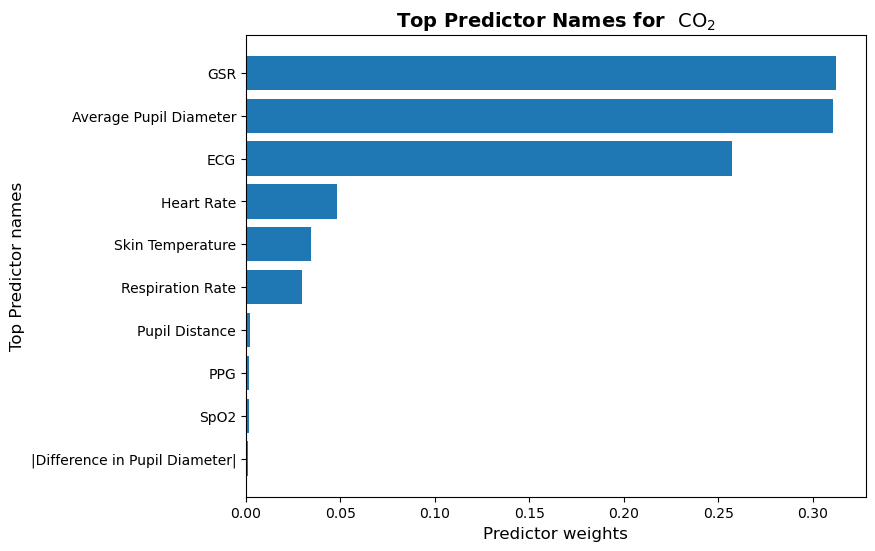

In [6]:
## Lets diplay the scores(or weights) next to the names

feature_list=sorted(zip(feature_importance,feature_names),reverse=True)
feature_list

## Lets extract the top 10 features

scores_ten=[]
names_ten=[]

for i in range(0,10):
    scores_ten.append(feature_list[i][0])
    
for i in range(0,10):
    names_ten.append(feature_list[i][1])
    
## Lets now reverse the list because barh plots in ascending order

scores_rev=[]
names_rev=[]
for i in scores_ten:
    scores_rev.insert(0,i)
    
for i in names_ten:
    names_rev.insert(0,i)
    
## Plot the horizontal graph

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.xlabel("Predictor weights",fontsize=12)
plt.ylabel("Top Predictor names", fontsize=12)
plt.title("Top Predictor Names for  $\mathrm{CO_2}$", fontsize=14,fontweight="bold")

plt.barh(names_rev,scores_rev)


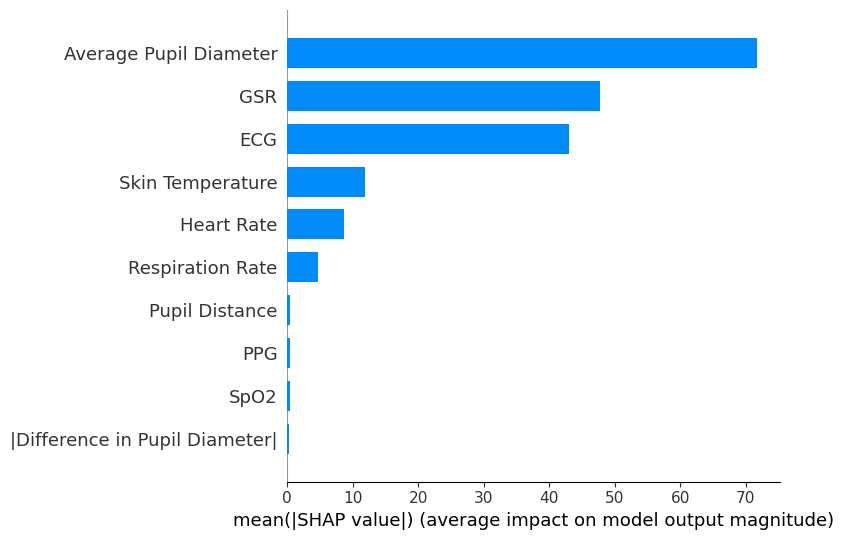

In [7]:
## Lets now use SHAP values for feature importance

import shap

shap_values = shap.TreeExplainer(forest_reg).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=10)




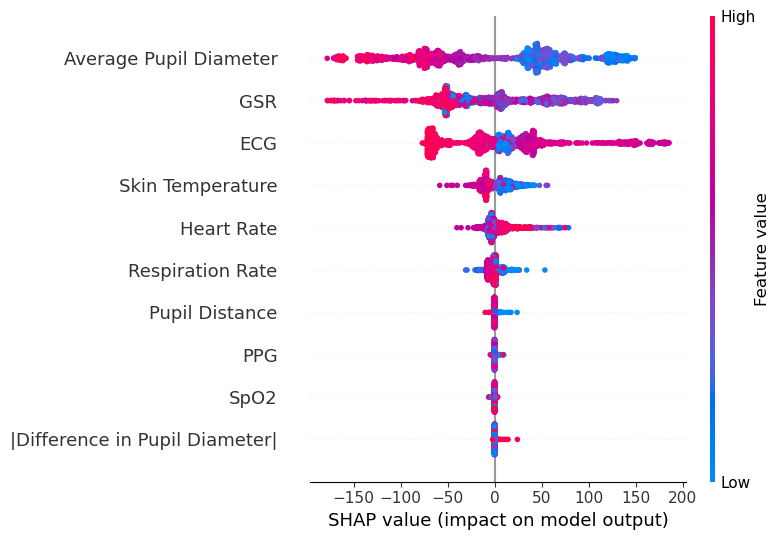

In [8]:
shap.summary_plot(shap_values, X_train,max_display=10)



In [9]:
## Now that we have the list of top 10 features, lets plot the correlation plot

names_rev.append('CO2') ## add the target NO2 for the correlation matrix
corr=df3[names_rev].corr()
corr



,|Difference in Pupil Diameter|,SpO2,PPG,Pupil Distance,Respiration Rate,Skin Temperature,Heart Rate,ECG,Average Pupil Diameter,GSR,CO2
|Difference in Pupil Diameter|,1.000000,0.030793,0.038529,-0.234868,0.004088,-0.001963,0.060948,0.067011,-0.117322,-0.015497,-0.044706
SpO2,0.030793,1.000000,-0.010464,-0.068459,0.537358,0.314694,-0.017860,-0.043644,-0.029129,-0.122008,-0.182879
PPG,0.038529,-0.010464,1.000000,-0.050455,-0.057975,-0.029354,0.022221,0.017683,-0.067060,-0.040409,0.082109
Pupil Distance,-0.234868,-0.068459,-0.050455,1.000000,-0.018387,-0.006126,-0.099888,0.028404,0.106420,0.007378,-0.042022
Respiration Rate,0.004088,0.537358,-0.057975,-0.018387,1.000000,0.531540,-0.230689,-0.305920,0.370669,0.071704,-0.432078
Skin Temperature,-0.001963,0.314694,-0.029354,-0.006126,0.531540,1.000000,-0.493415,0.040953,0.142125,-0.528327,-0.389064
Heart Rate,0.060948,-0.017860,0.022221,-0.099888,-0.230689,-0.493415,1.000000,0.225279,-0.482430,-0.020752,0.292842
ECG,0.067011,-0.043644,0.017683,0.028404,-0.305920,0.040953,0.225279,1.000000,-0.588840,-0.684508,0.210840
Average Pupil Diameter,-0.117322,-0.029129,-0.067060,0.106420,0.370669,0.142125,-0.482430,-0.588840,1.000000,0.600034,-0.562625
GSR,-0.015497,-0.122008,-0.040409,0.007378,0.071704,-0.528327,-0.020752,-0.684508,0.600034,1.000000,-0.229847


<AxesSubplot:>

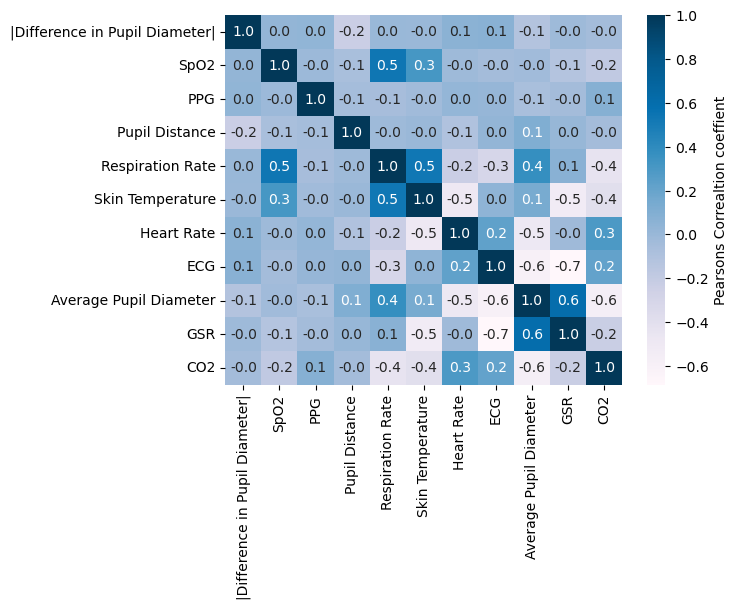

In [10]:
import seaborn as sns
sns.heatmap(corr,cmap="PuBu",annot=True,fmt=".1f",cbar_kws={'label': 'Pearsons Correaltion coeffient'})

In [11]:
## Now lets plot the mutual information

from sklearn.feature_selection import mutual_info_regression

## Lets calucalute the mutual information against each of the top 10 features

mf_mat=[]
for i in range(0,11):
    for j in range(0,11):
        dd=df3[names_rev[i]]
        mm=df3[names_rev[j]]

        kk=dd.to_numpy().reshape((-1,1))
        vv=mm.to_numpy().reshape((-1,1))
        mi=mutual_info_regression(kk,vv)
        mf_mat.append(mi)

mf_mat_arr=np.asarray(mf_mat)  ## transform the elements from a list to array

# reshape array into 11 rows x11 columns

reshaped_array = mf_mat_arr.reshape(11, 11).T 


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [12]:
mf_df=pd.DataFrame(reshaped_array,columns=[names_rev],index=[names_rev]) ## convert into a pandas DataFrame
mf_df


,|Difference in Pupil Diameter|,SpO2,PPG,Pupil Distance,Respiration Rate,Skin Temperature,Heart Rate,ECG,Average Pupil Diameter,GSR,CO2
|Difference in Pupil Diameter|,3.550295,0.000000,0.018499,0.060988,0.000000,0.000000,0.003250,0.018791,0.010402,0.025420,0.028756
SpO2,0.003421,1.741831,0.112545,0.006728,0.375906,0.126995,0.104863,0.267587,0.040737,0.213198,0.278466
PPG,0.012593,0.115024,6.160500,0.000000,0.249076,0.094891,0.101475,0.230574,0.096279,0.189976,0.274502
Pupil Distance,0.050445,0.000000,0.000698,5.155563,0.023354,0.039706,0.023100,0.054548,0.005559,0.023808,0.029960
Respiration Rate,0.000000,0.352953,0.250264,0.019997,5.158449,0.667845,0.547235,0.801275,0.353610,0.791587,0.848400
Skin Temperature,0.000000,0.110286,0.093078,0.041134,0.666668,3.623522,0.701464,1.081717,0.337843,1.321393,1.683571
Heart Rate,0.012820,0.062724,0.099857,0.019512,0.545289,0.708488,3.552993,0.736554,0.273674,1.170428,1.608126
ECG,0.013914,0.266440,0.231287,0.053699,0.802068,1.082548,0.737207,6.471238,0.521202,1.405031,1.496262
Average Pupil Diameter,0.010031,0.049291,0.096628,0.001895,0.351039,0.337182,0.269319,0.517168,5.848900,0.571151,0.598643
GSR,0.019228,0.207288,0.189538,0.025950,0.790269,1.317030,1.183949,1.406409,0.572519,6.080658,2.509830


<AxesSubplot:xlabel='None', ylabel='None'>

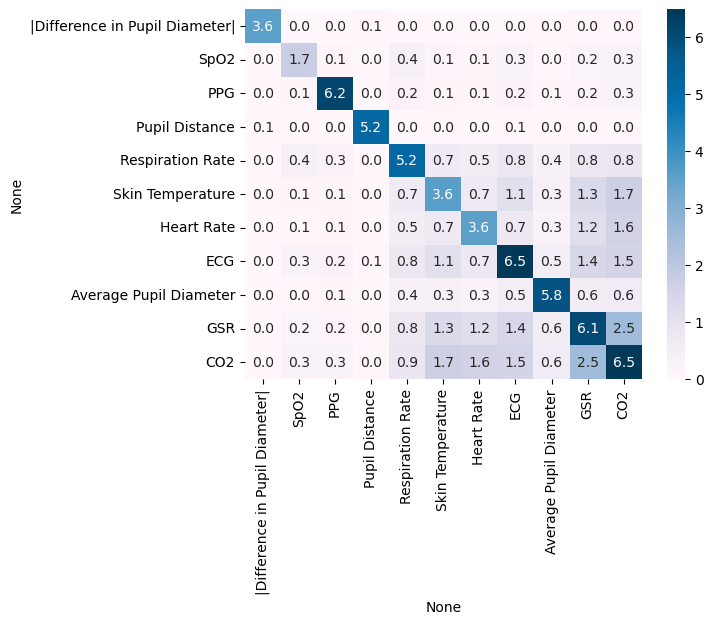

In [13]:
sns.heatmap(mf_df,cmap="PuBu",annot=True,fmt='.1f') ## Now lets plot the mutual information heatmap


In [14]:
## The test prediction

test_prediction_RF=forest_reg.predict(X_test)
RF_mse=mean_squared_error(y_test,test_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_test=RF_rmse

print('The test RMSE for CO2 is:::', '%.2f' % RF_rmse)

## Lets now use the 6 fold cross-validation

#from sklearn.model_selection import cross_val_score
#scores=cross_val_score(forest_reg,X_train_scaled,y_train,scoring="neg_mean_squared_error",cv=6)
#RF_rmse_scores=np.sqrt(-scores)
#RF_rmse_scores
#RF_rmse=RF_rmse_scores.mean()

#cv_rmse_NO2=RF_rmse_scores.mean()

#print('The cross-validation RMSE for XO2 is:::', '%.2f' % cv_rmse_NO2)

The test RMSE for CO2 is::: 27.44


In [15]:
### The correlation values

from scipy.stats import pearsonr

## The train correlation
correlation_train=pearsonr(y_train,train_prediction_RF)[0]
print('The train correlation r^2 for CO2 is:::', '%.2f' % correlation_train)

## The test correlation
correlation_test=pearsonr(y_test,test_prediction_RF)[0]
print('The test correlation r^2 for CO2 is:::', '%.2f' % correlation_test)

The train correlation r^2 for CO2 is::: 1.00
The test correlation r^2 for CO2 is::: 0.98


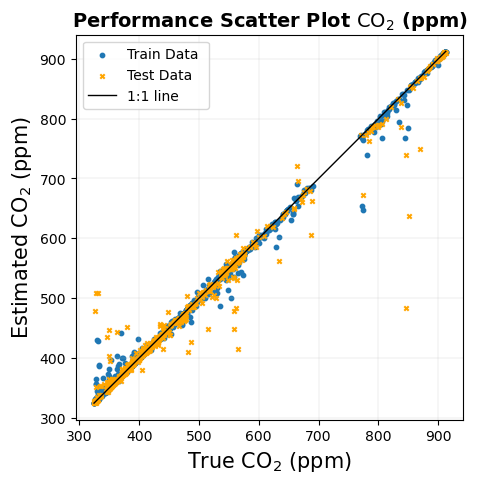

In [16]:
## Lets plot the scatter plot

import matplotlib.pyplot as plt


plt.figure(figsize=(5,5))
plt.scatter(y_train, train_prediction_RF,s=10,c='C0',label='Train Data ')
plt.scatter(y_test, test_prediction_RF,marker='x',s=10,c='orange',label='Test Data')


p1 = max(max(train_prediction_RF), max(y_train))
p2 = min(min(train_prediction_RF), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black',label='1:1 line',linewidth=1)
plt.xlabel('True $\mathrm{CO_2}$ (ppm)', fontsize=15)
plt.ylabel('Estimated $\mathrm{CO_2}$ (ppm)', fontsize=15)
plt.axis('equal')
plt.title("Performance Scatter Plot $\mathrm{CO_2}$ (ppm)", fontsize=14,fontweight="bold")
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()

In [17]:
## Lets plot the quantile quantile 
## An easy way to plot the QQ plots but less customization
#from statsmodels.graphics.gofplots import qqplot_2samples

all_preds=np.concatenate((train_prediction_RF,test_prediction_RF)) ## the list of all predictions and target values
preds=np.sort(all_preds)
tars=target.sort_values()

#qqplot_2samples(tars,preds,line='45',xlabel='Quantiles of True $\mathrm{NO_2}$',ylabel='Quantiles of Estimated $\mathrm{NO_2}$')
#plt. title('Quantile Quantile plot of $\mathrm{NO_2}$ ',fontsize=14,fontweight="bold")
#plt.grid(axis='both',linewidth=0.15)
#plt.show()

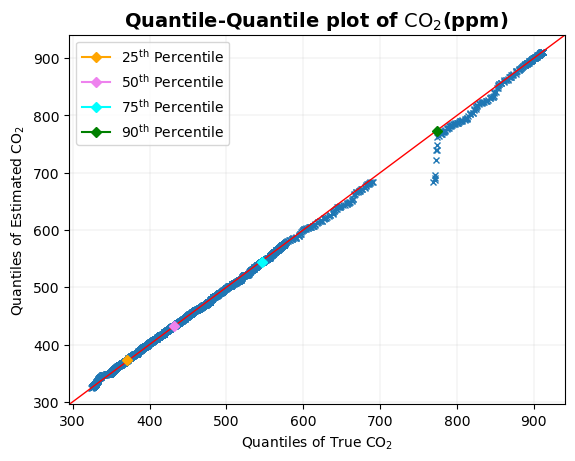

In [18]:
## Source https://stackoverflow.com/questions/35878552/how-to-change-plot-properties-of-statsmodels-qqplot-python
## Source https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.ProbPlot.html

## This helps in customizing the graph
import statsmodels.api as sm
import scipy.stats as stats

pp_x = sm.ProbPlot(preds, fit=False)
pp_y = sm.ProbPlot(tars, fit=False)
qq = pp_x.qqplot(xlabel='Quantiles of True $\mathrm{CO_2}$',ylabel='Quantiles of Estimated $\mathrm{CO_2}$',marker='x',markersize=4,other=pp_y)

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1)
                                 
tars_25=np.percentile(tars,25)  ## for the percentiles                                                        
tars_50=np.percentile(tars,50)
tars_75=np.percentile(tars,75)
tars_90=np.percentile(tars,90)


preds_25=np.percentile(preds,25)
preds_50=np.percentile(preds,50)
preds_75=np.percentile(preds,75)  
preds_90=np.percentile(tars,90)  ## end of percentiles

plt.plot(tars_25,preds_25,marker="D",markersize=5,color="orange",label="$\mathrm{25^{th}}$ Percentile")
plt.plot(tars_50,preds_50,marker="D",markersize=5,color="violet",label="$\mathrm{50^{th}}$ Percentile")
plt.plot(tars_75,preds_75,marker="D",markersize=5,color="Cyan",label="$\mathrm{75^{th}}$ Percentile")
plt.plot(tars_90,preds_90,marker="D",markersize=5,color="Green",label="$\mathrm{90^{th}}$ Percentile")


plt.grid(axis='both',linewidth=0.15)

plt. title('Quantile-Quantile plot of $\mathrm{CO_2}$(ppm) ',fontsize=14,fontweight="bold")

plt.legend()
plt.show()


## Note that since the number of samples is the same, sorting the values in ascending or descending order and then...
## plotting a scatter plot will also do the same thing as the quantiles are located in same point for distribution..
## of same size.

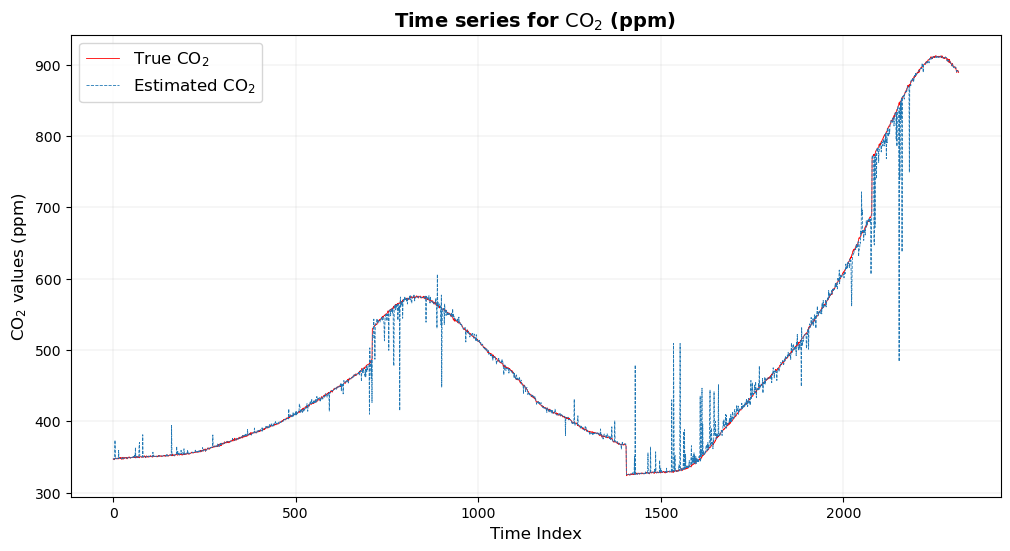

In [19]:
## Lets now plot the Time series plot. 

## Note that using the train_test_split function shuffles the data. so first the y_train and y_test has to be....
#concatenated. Dont use the "target" variable because the predicted values-train_prediction and train_prediction are not in
## in a timestamp but in an array.

splitted_original_data=pd.concat([y_train,y_test]) ## concatenate the splitted original target variable i.e. CO_2
splitted_original_data

predicted_splited=np.concatenate((train_prediction_RF,test_prediction_RF),axis=None) ## concatenate the predicted....
predicted_splited ## train and test numpy arrays

splitted_df=splitted_original_data.to_frame() ##convert splitted original data CO2 from pandas series to 
splitted_df                                       ## pandas dataframe

splitted_df['predicted_splited']=predicted_splited.tolist() ## Now concatenate the CO2 dataframe and the
splitted_df                                                         ## the numpy array

sorted_df=splitted_df.sort_values(by='dateTime') ## sort according to timestamp
sorted_df  

df_reset=sorted_df.reset_index() ##reset the index and start from zero as the hh:mm:ss is not real time
df_reset 

df_indexed=df_reset.drop(columns="dateTime") 
df_indexed 

df_timeseries=df_indexed.rename(columns={'CO2':'True $\mathrm{CO_2}$','predicted_splited':'Estimated $\mathrm{CO_2}$'})
df_timeseries  


##Lets now plot the time series

# An alternative way go plot:: ax=df_timeseries.plot(figsize=(12, 6), fontsize=15,linewidth=0.6,linestyle='-')

## sorurce of code below https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_timeseries['True $\mathrm{CO_2}$'],label='True $\mathrm{CO_2}$',linewidth=0.6,color='red')
ax.plot(df_timeseries['Estimated $\mathrm{CO_2}$'],label='Estimated $\mathrm{CO_2}$',linewidth=0.6,linestyle='--')

plt.xlabel('Time Index', fontsize=12)
plt.ylabel('$\mathrm{CO_2}$ values (ppm)',fontsize=12)
plt.title('Time series for $\mathrm{CO_2}$ (ppm) ',fontsize=14,fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='both',linewidth=0.15)
plt.show()

# Bar Plot for r^2

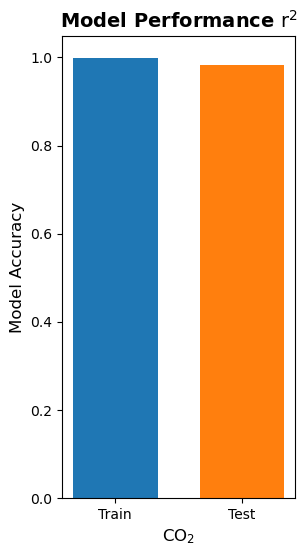

In [20]:
vals=[correlation_train,correlation_test]
bars=["Train",'Test']

x_pos=[0,0.3]

plt.figure(figsize=(3, 6))

plt.bar(x_pos,vals,width=0.2,color=["tab:blue","tab:orange"])

plt.xticks(x_pos, bars)

plt.xlabel("$\mathrm{CO_2}$",fontsize=12)
plt.ylabel("Model Accuracy", fontsize=12)

plt.title("Model Performance $\mathrm{r^2}$", fontsize=14,fontweight="bold")
plt.show()

plt.show()

# Bar plot for RMSE

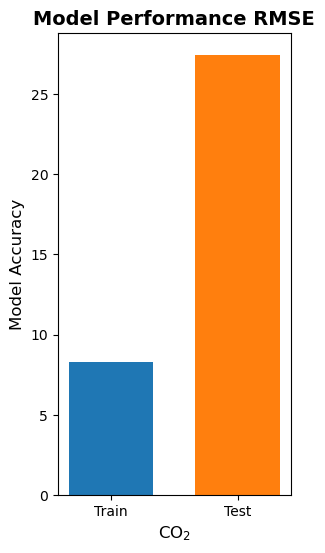

In [21]:
vals=[RF_rmse_train,RF_rmse_test]
bars=["Train",'Test']

x_pos=[0,0.3]

plt.figure(figsize=(3, 6))

plt.bar(x_pos,vals,width=0.2,color=["tab:blue","tab:orange"])

plt.xticks(x_pos, bars)

plt.xlabel("$\mathrm{CO_2}$",fontsize=12)
plt.ylabel("Model Accuracy", fontsize=12)

plt.title("Model Performance RMSE", fontsize=14,fontweight="bold")
plt.show()

plt.show()
